Connected to tracking-barbell-exercises (Python 3.8.15)

In [1]:
import sys
sys.path.append("../src/features")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from OutlierDetectors import plot_binary_outliers, mark_outliers_IQR, mark_outliers_LOF

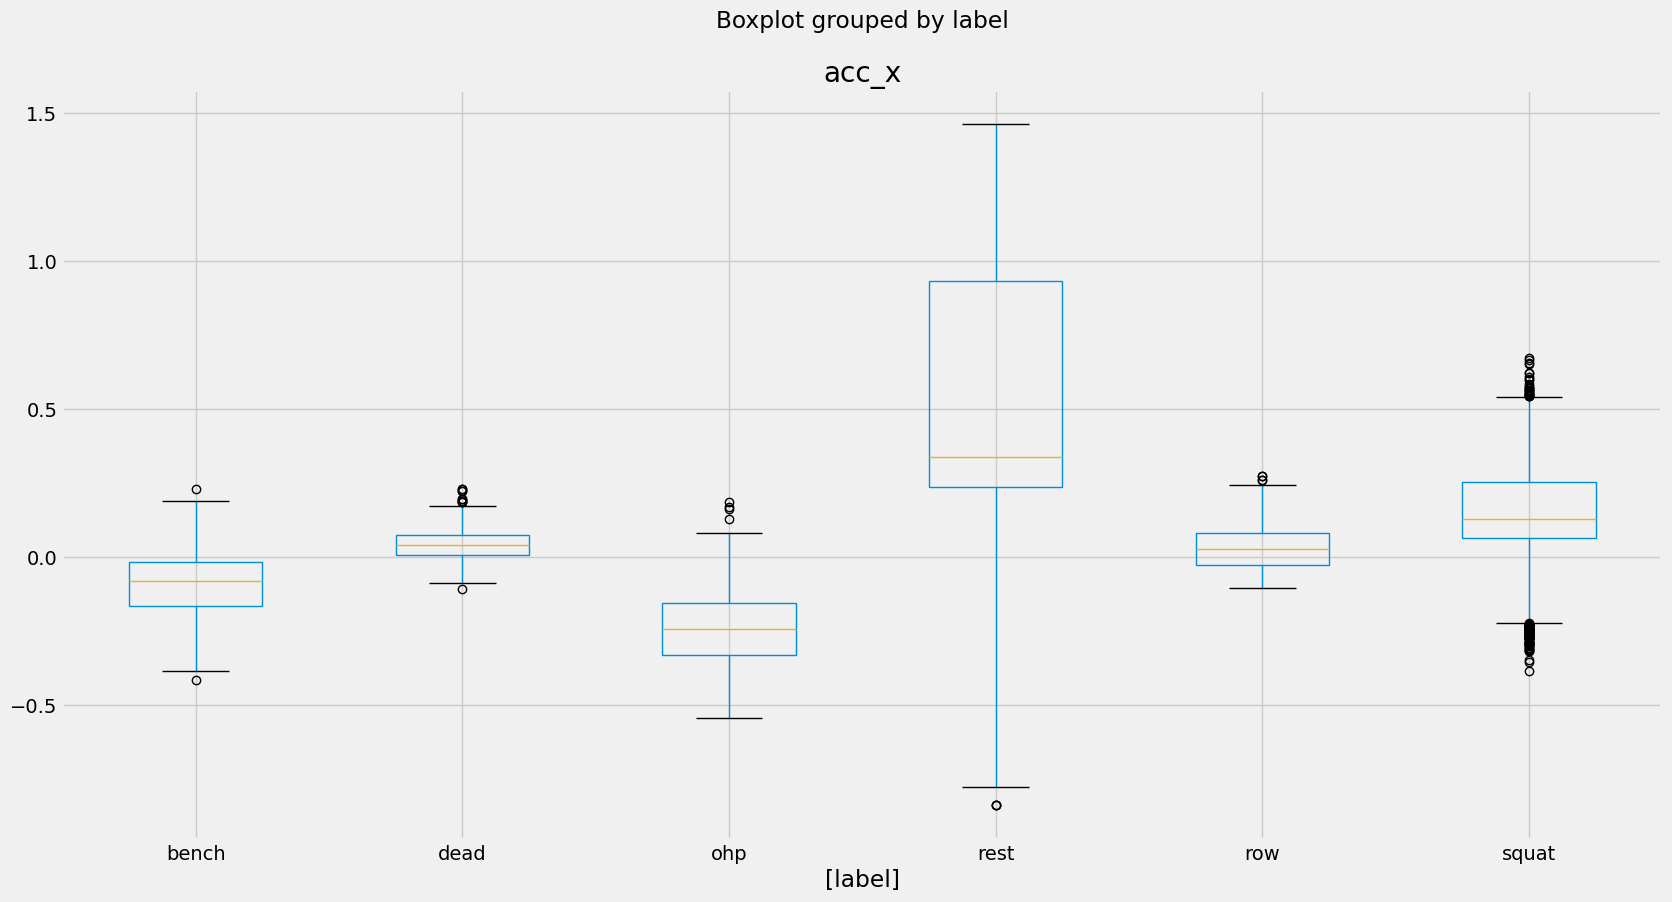

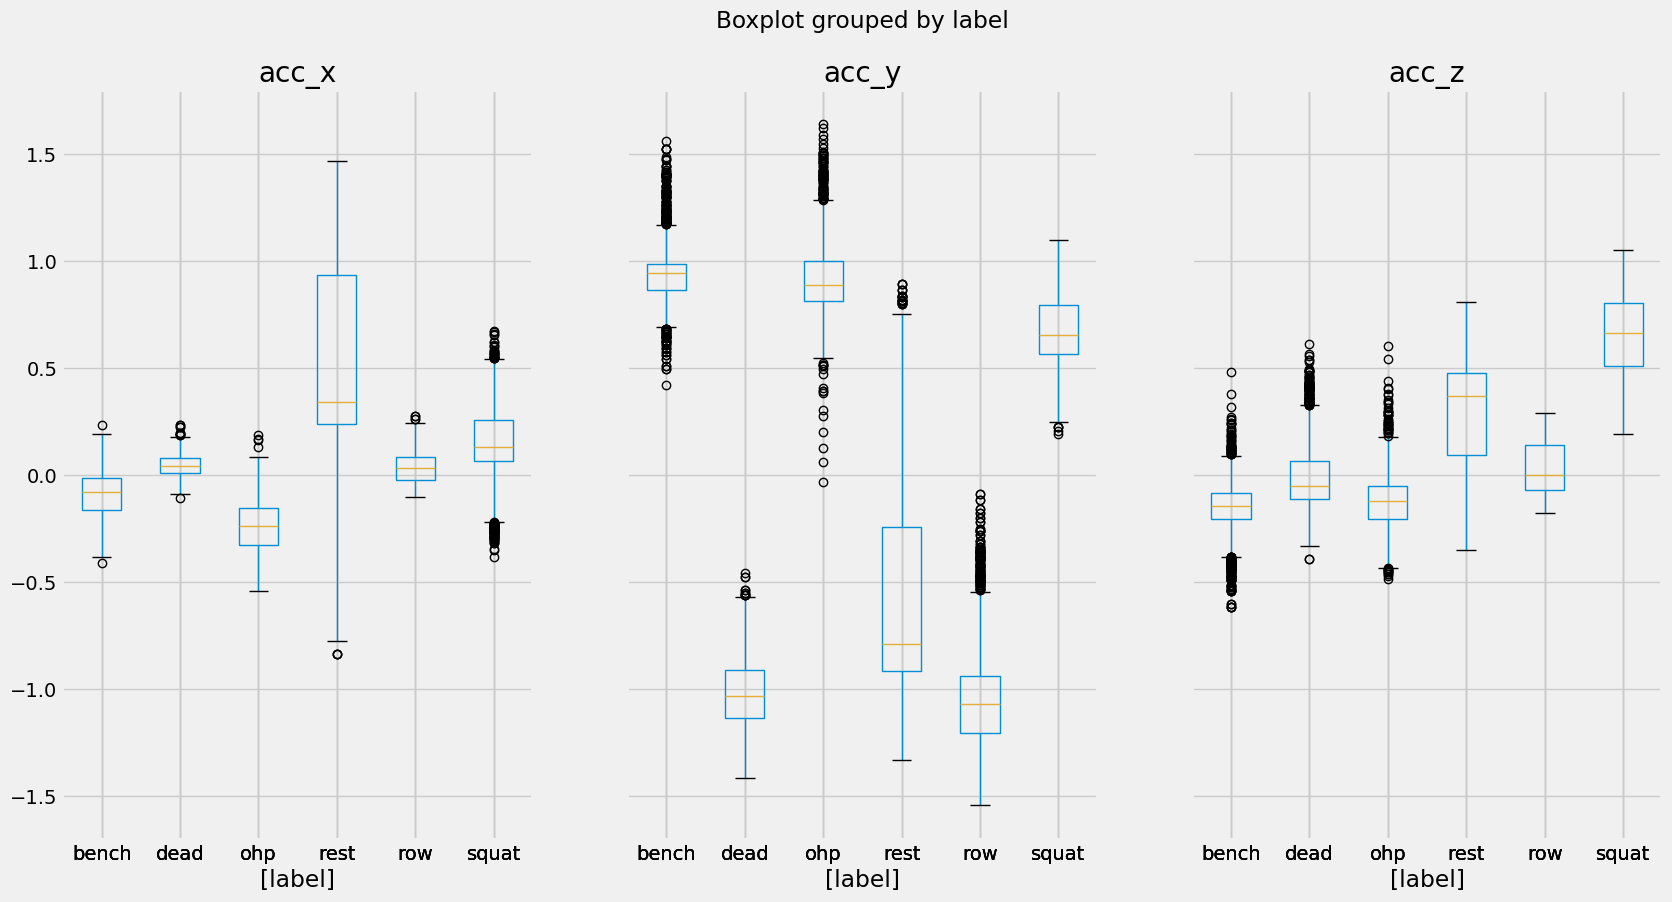

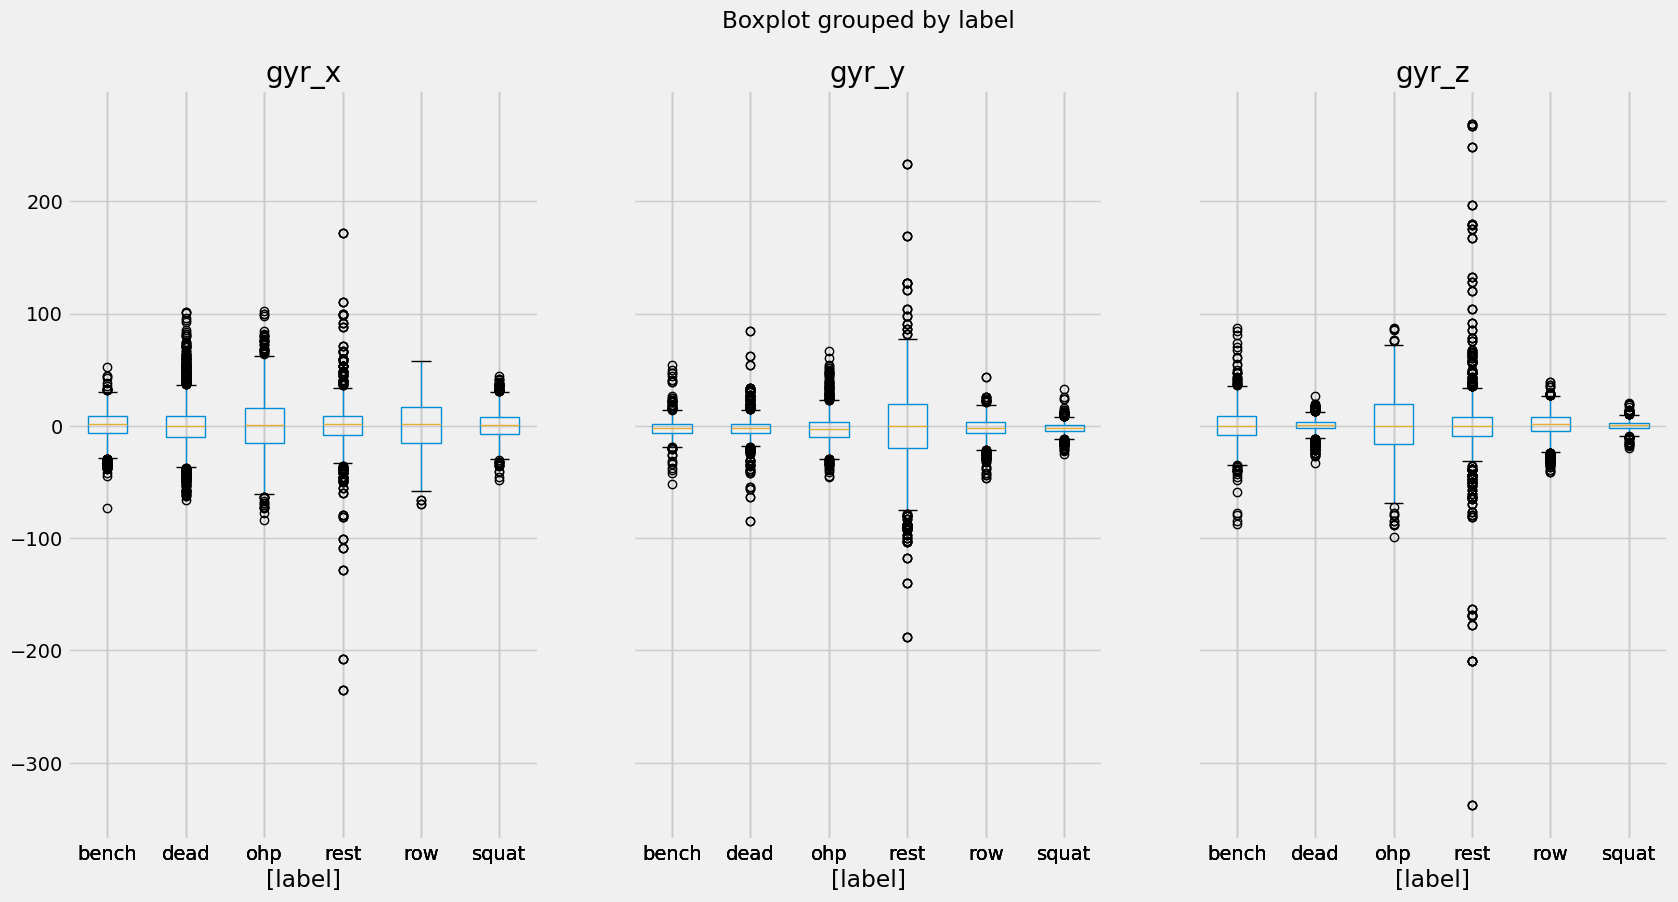

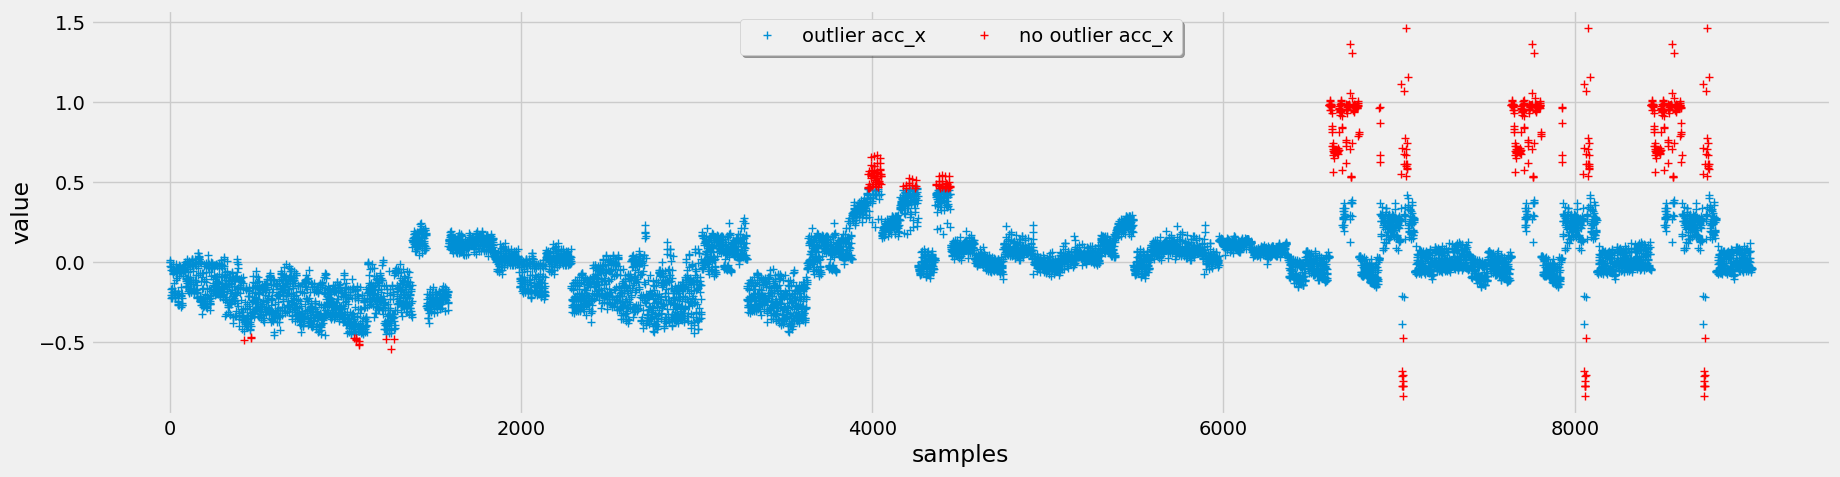

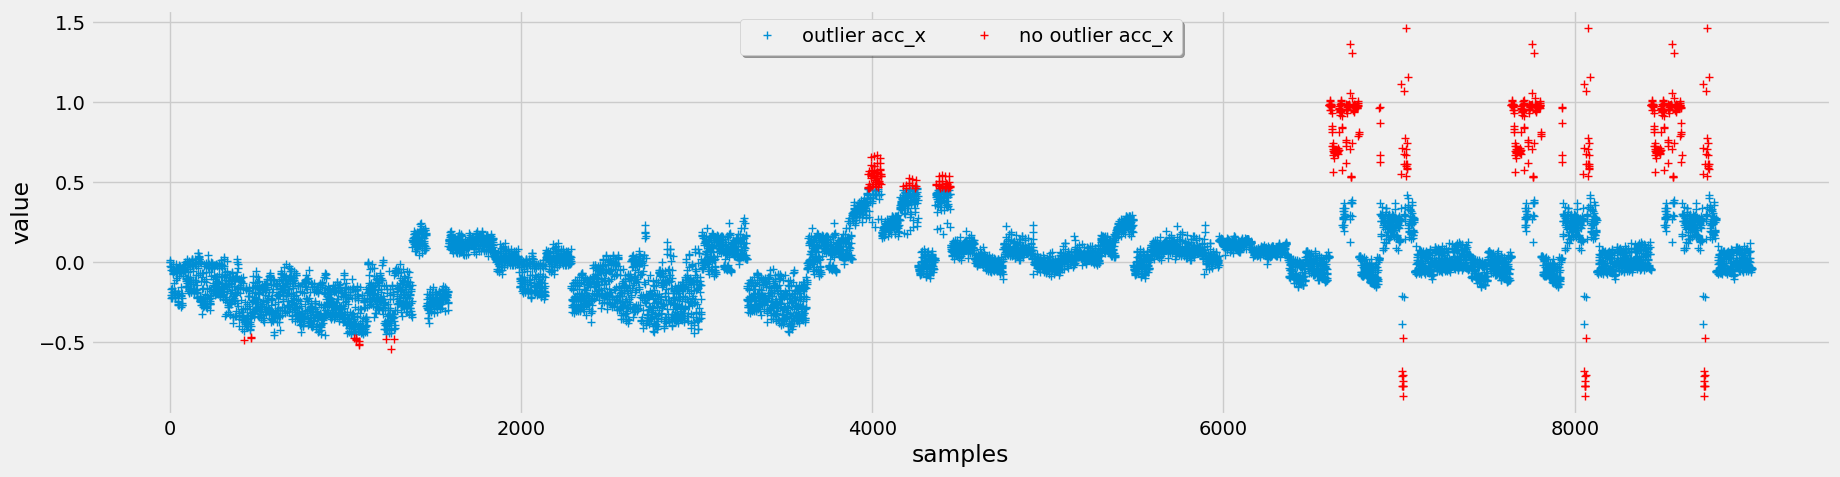

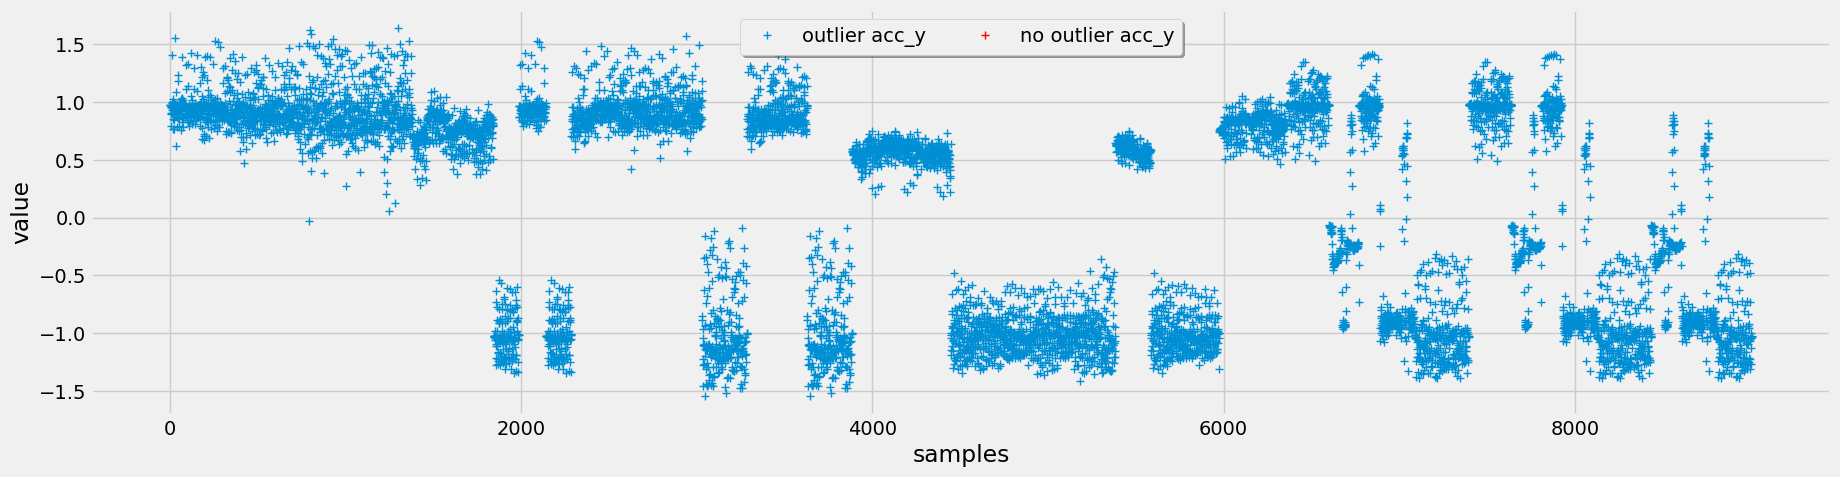

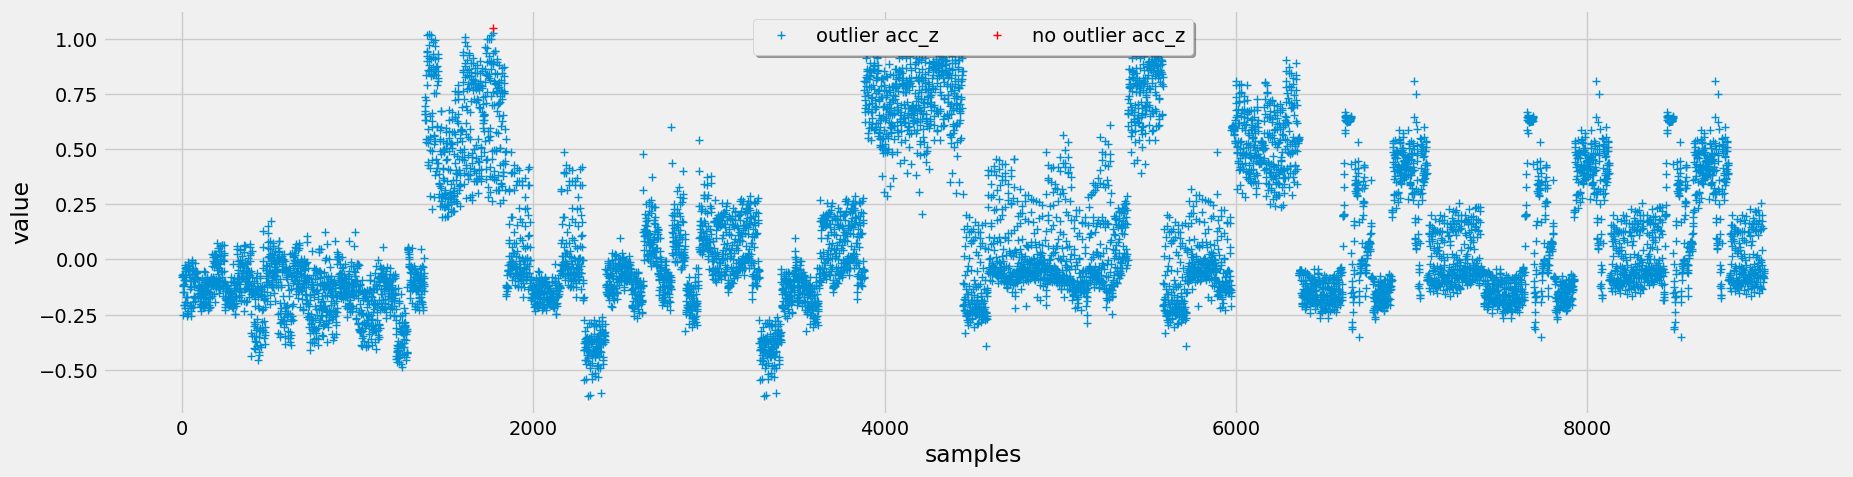

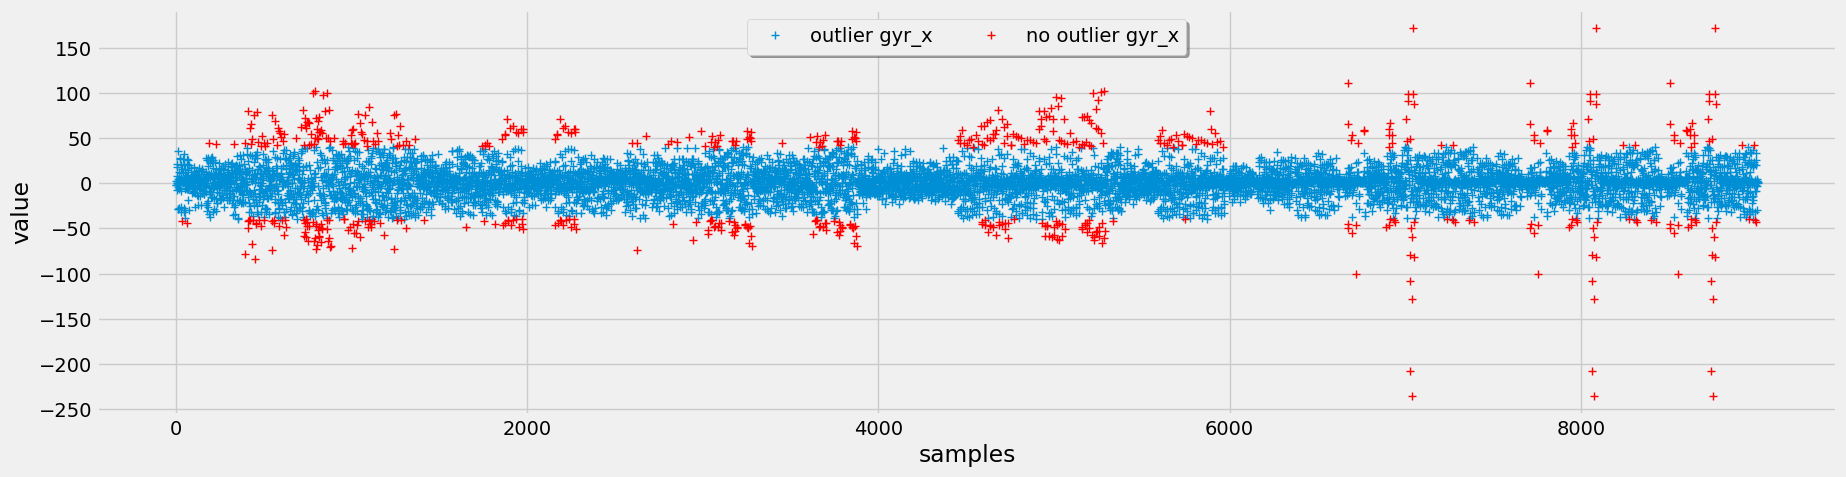

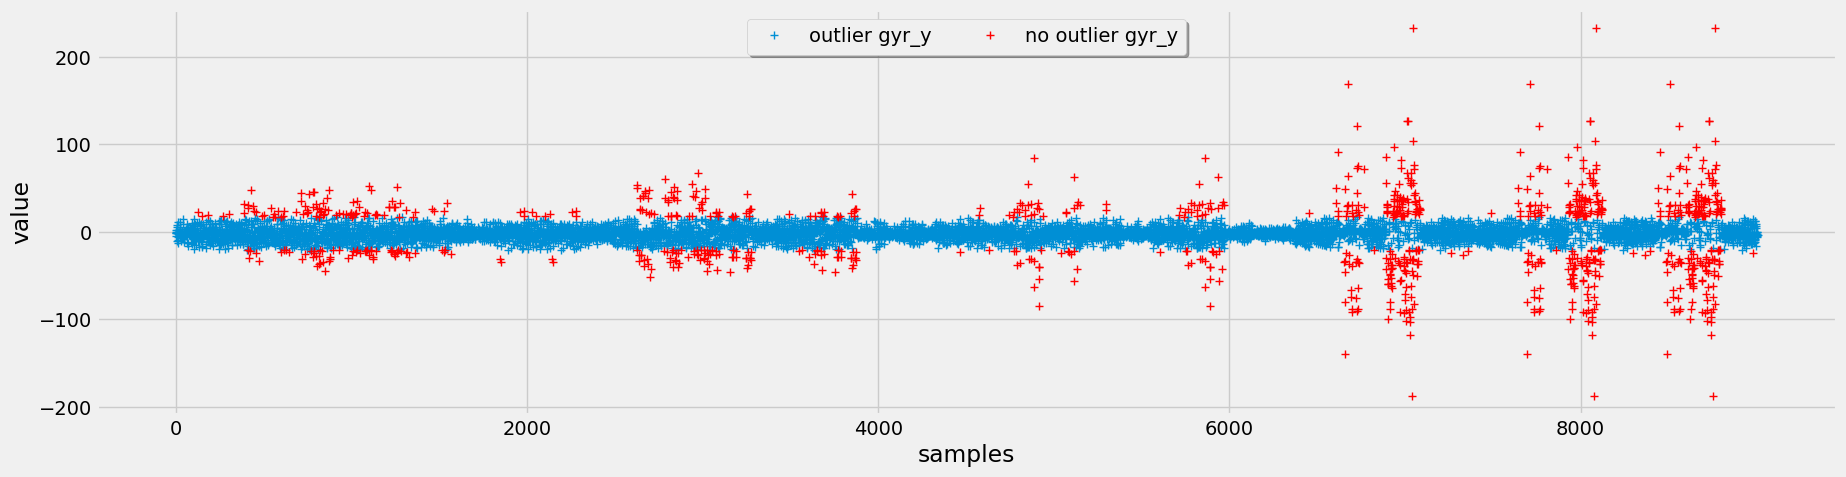

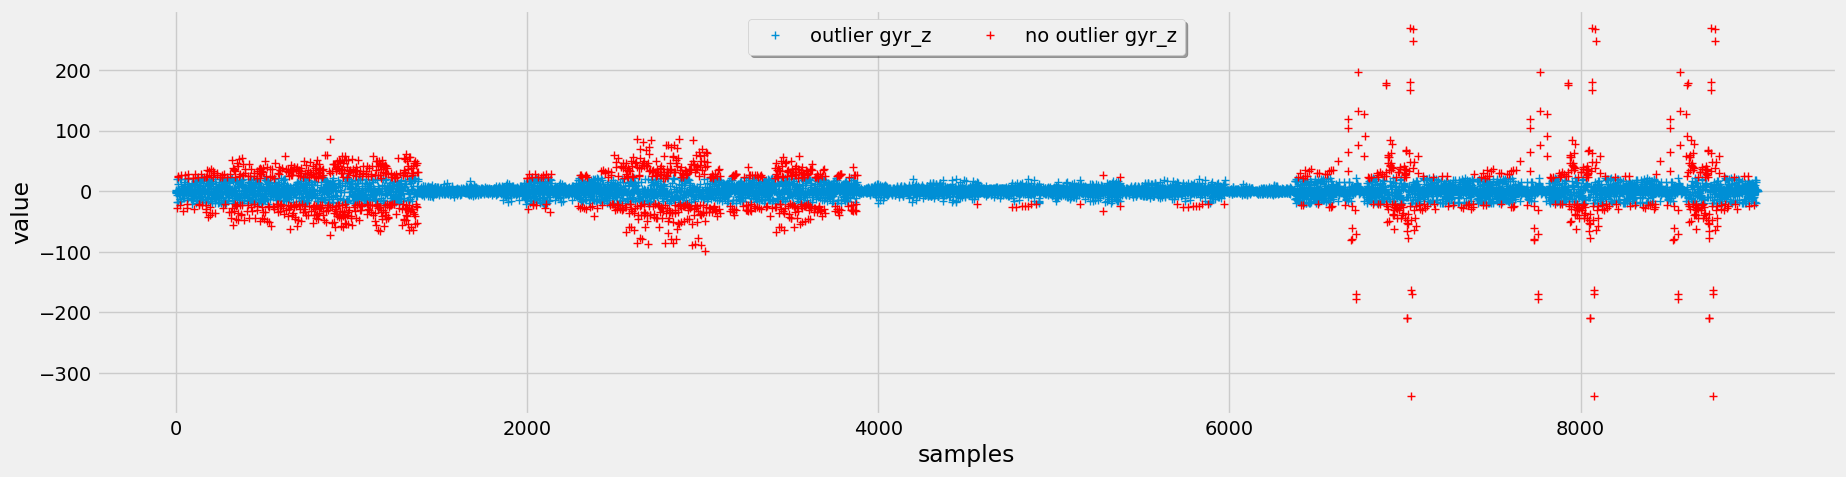

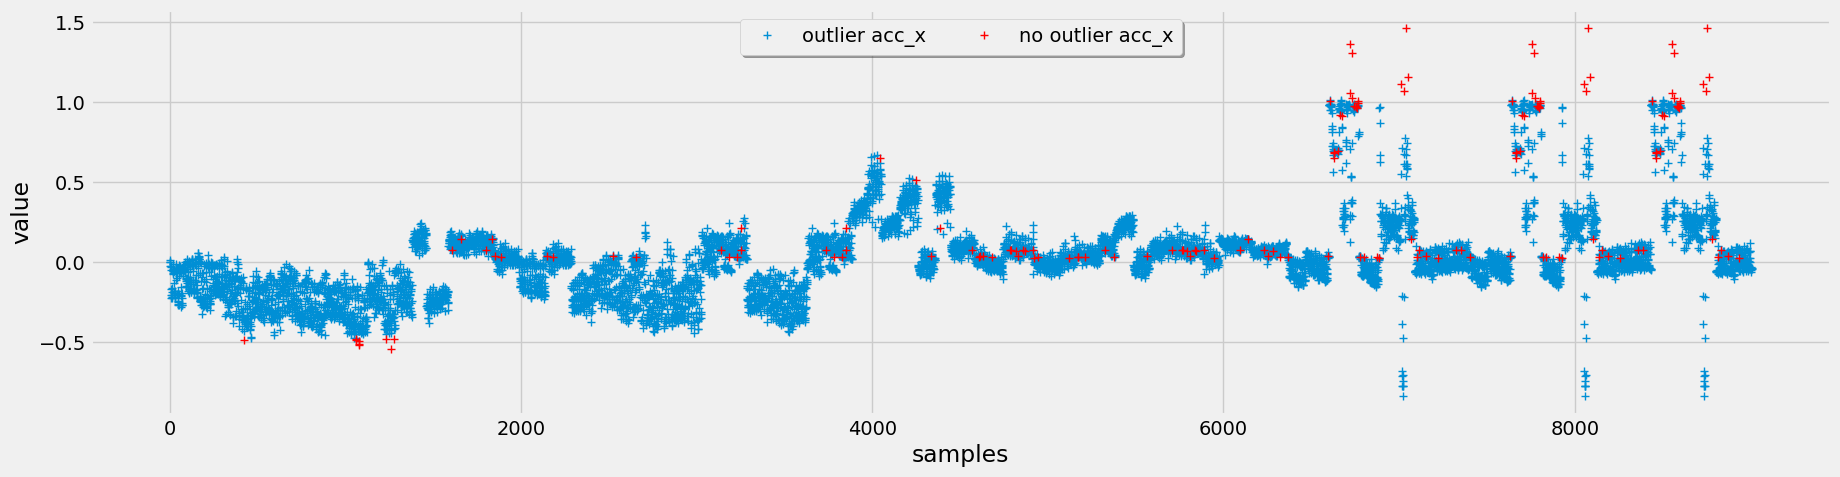

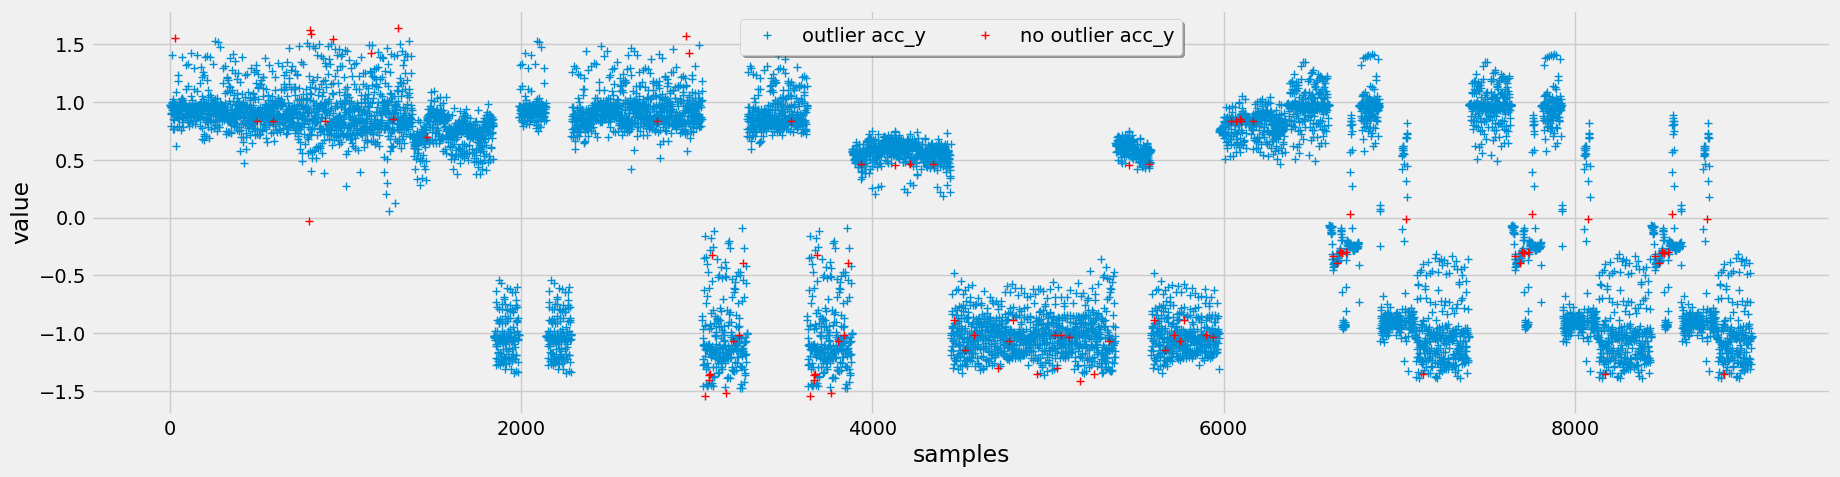

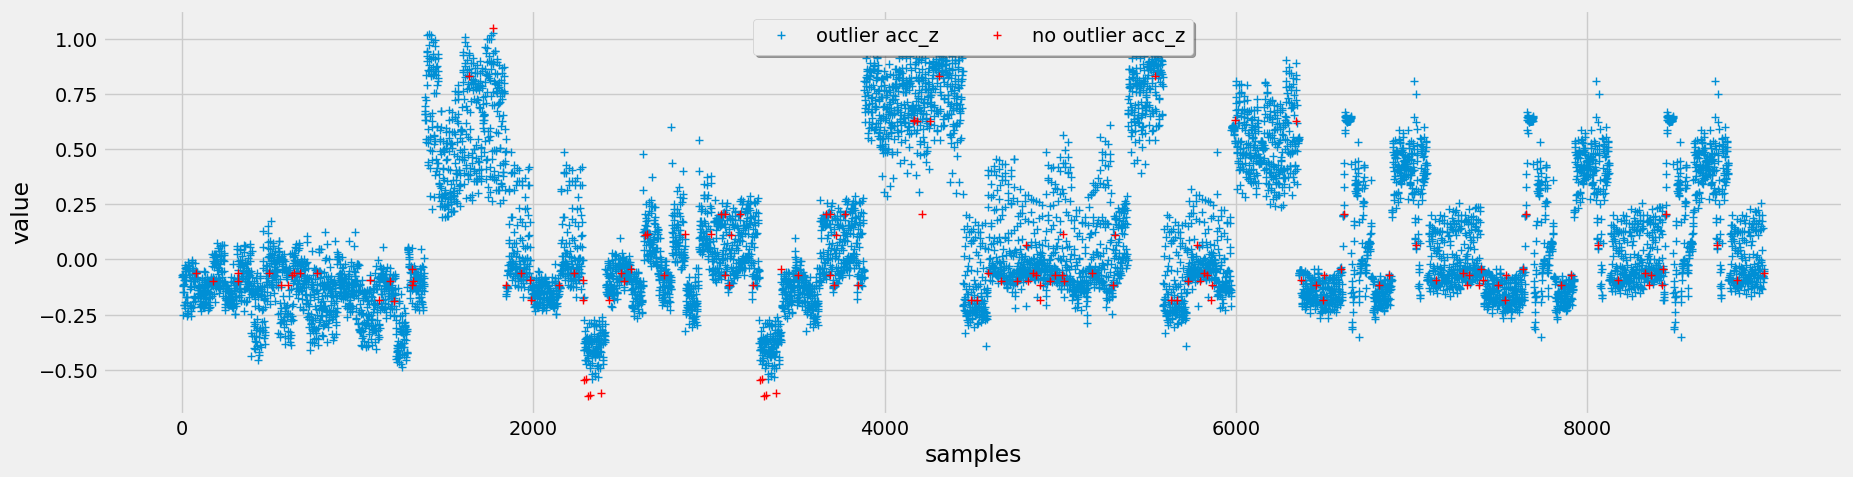

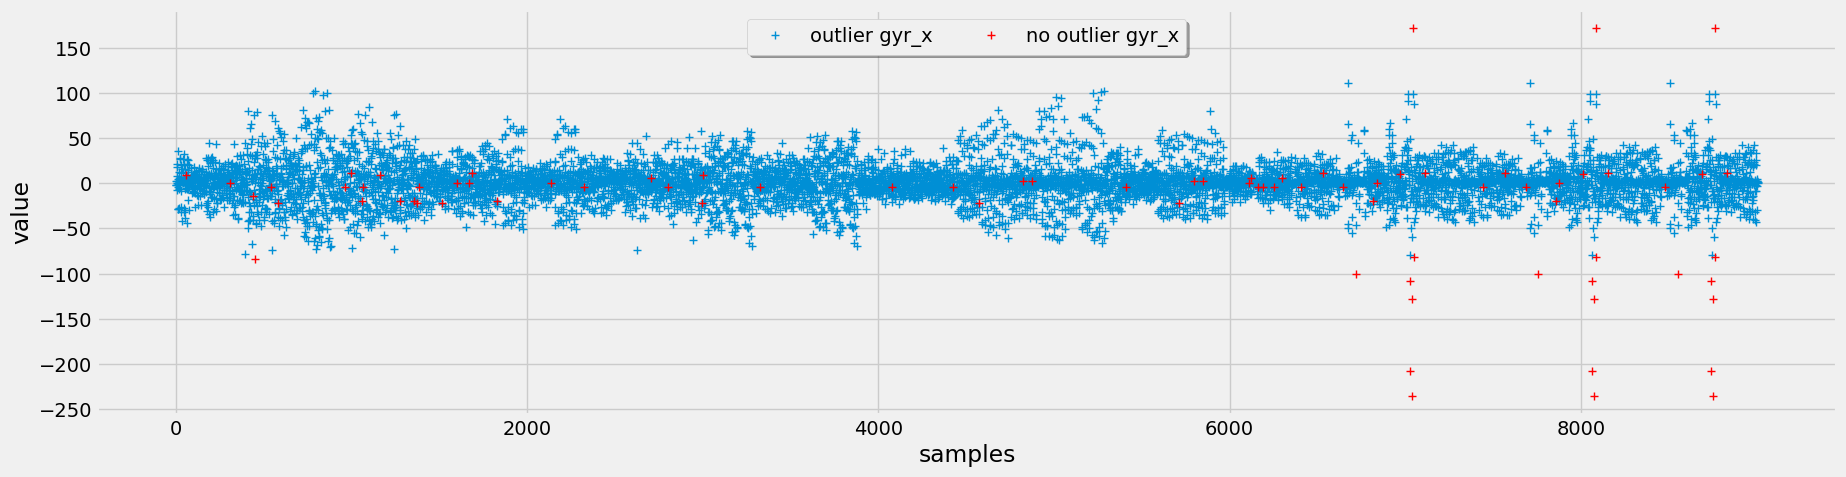

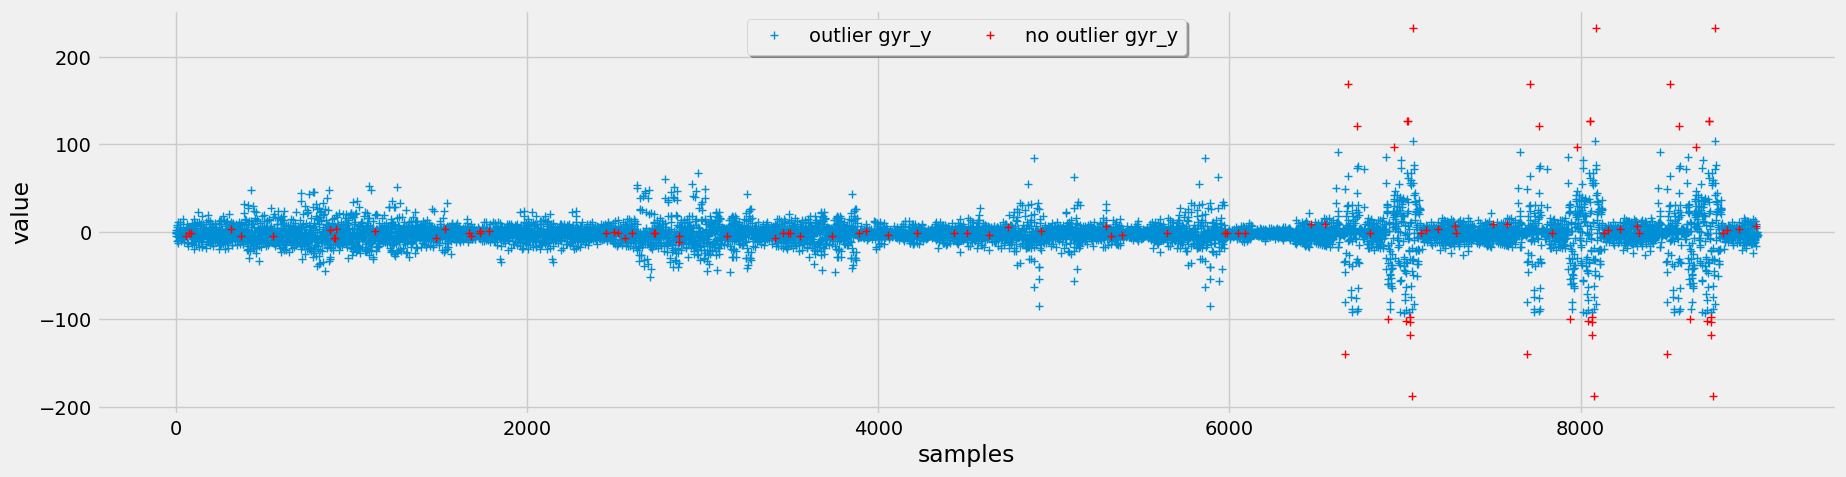

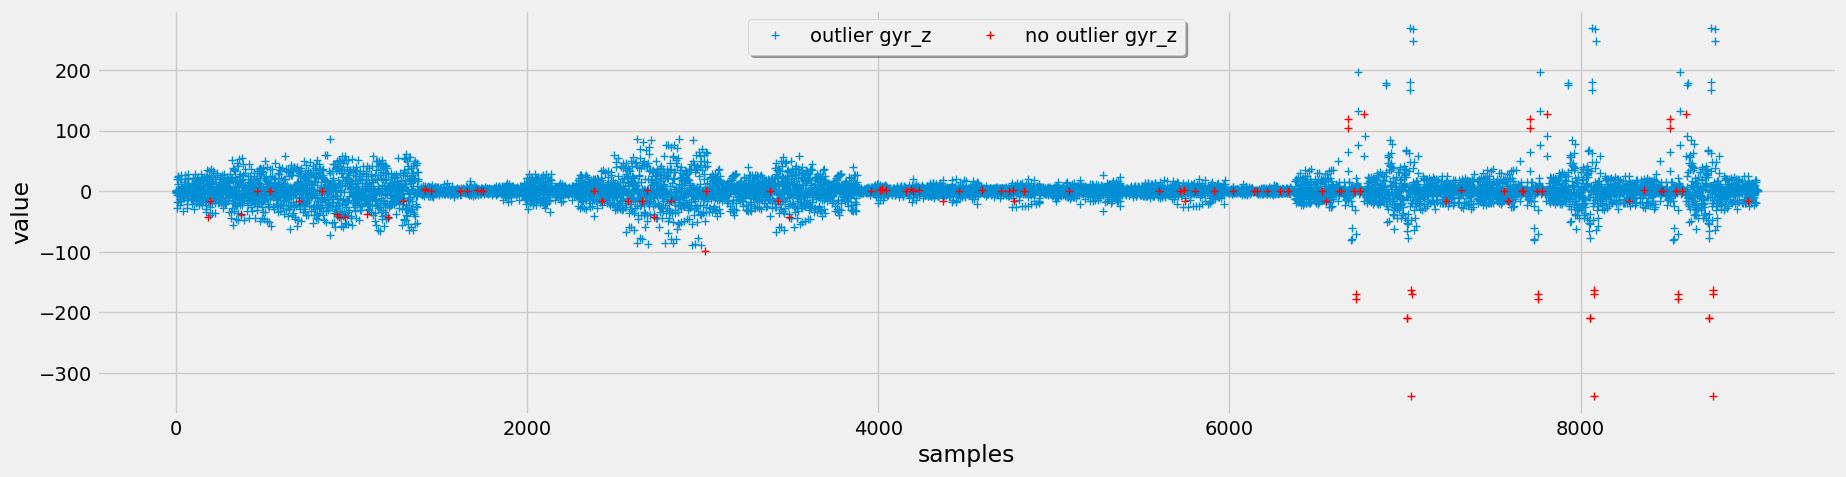

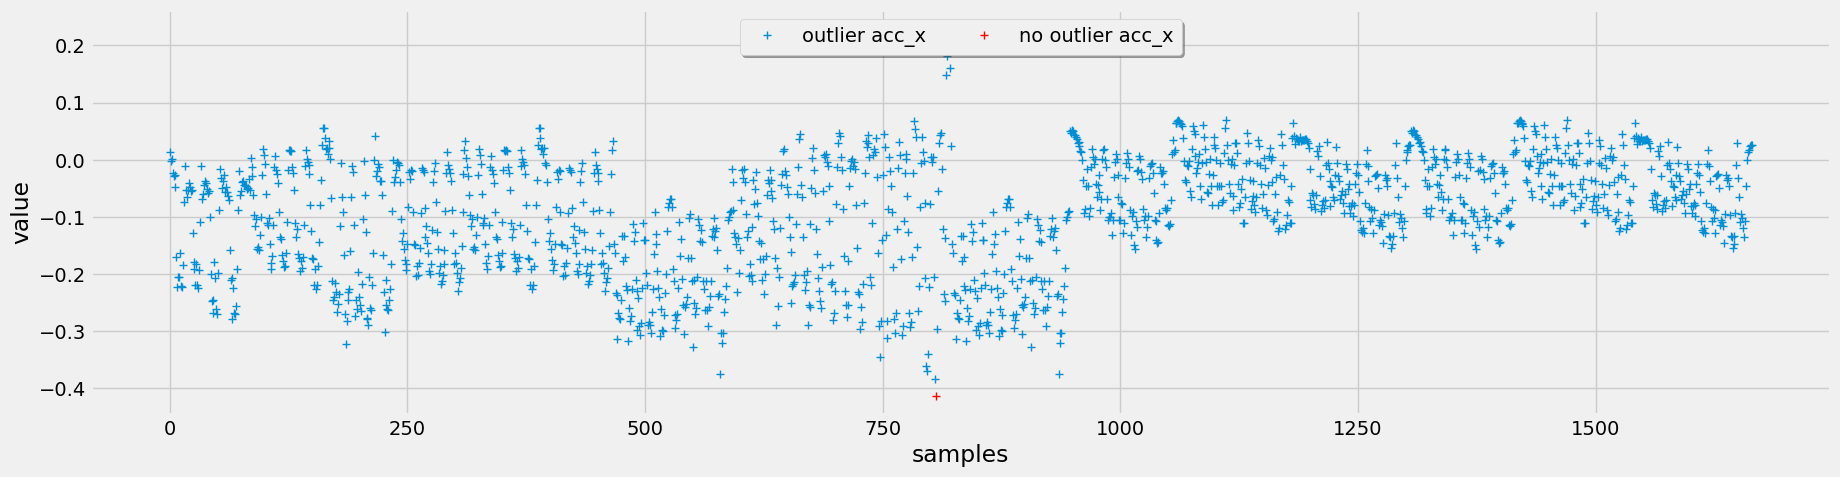

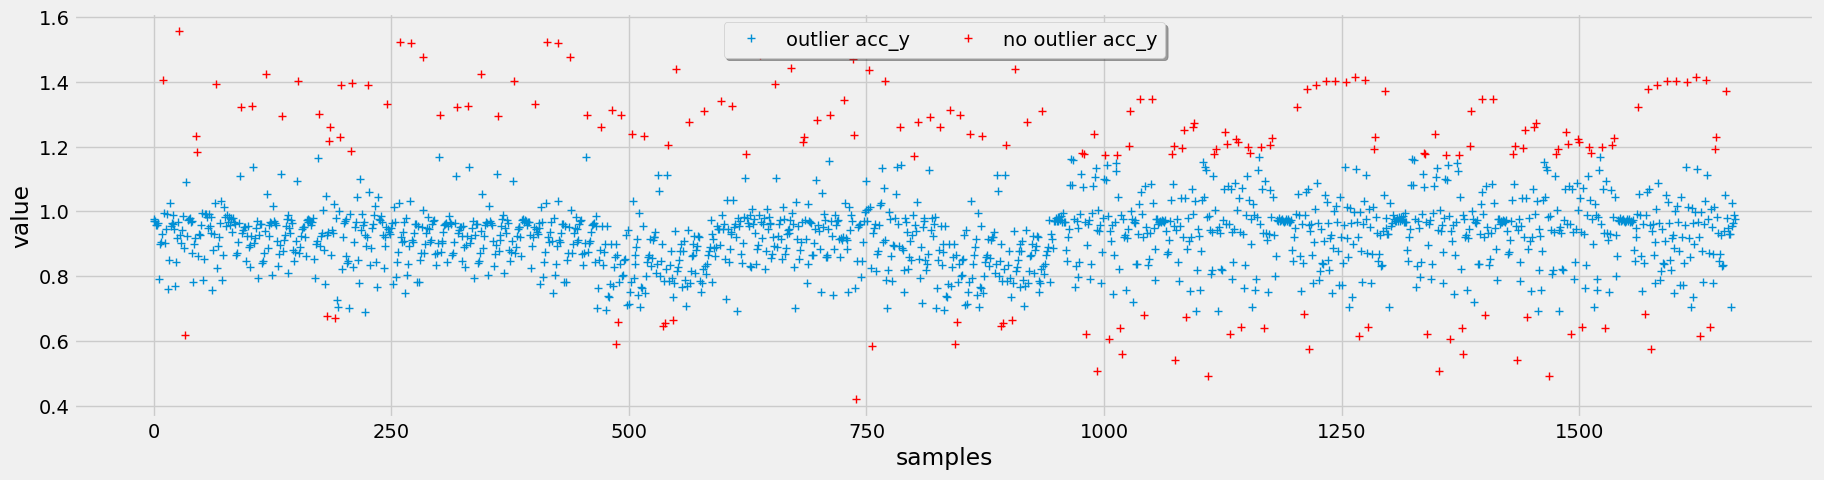

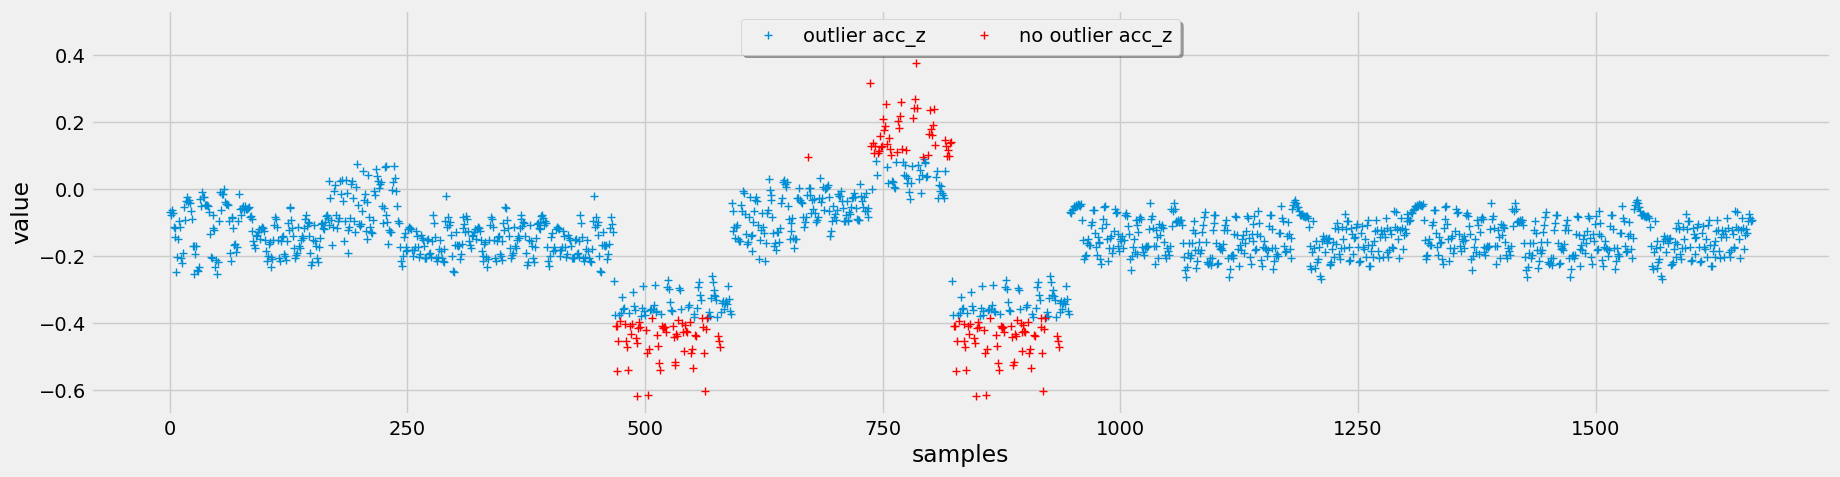

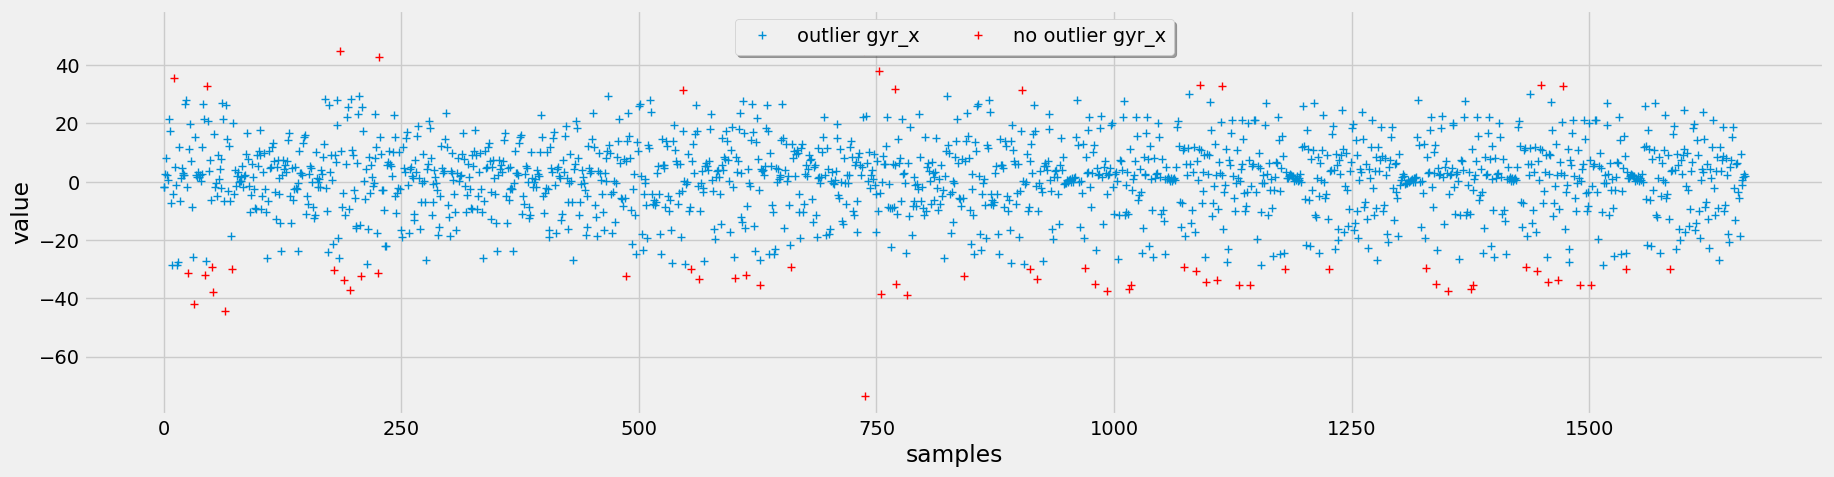

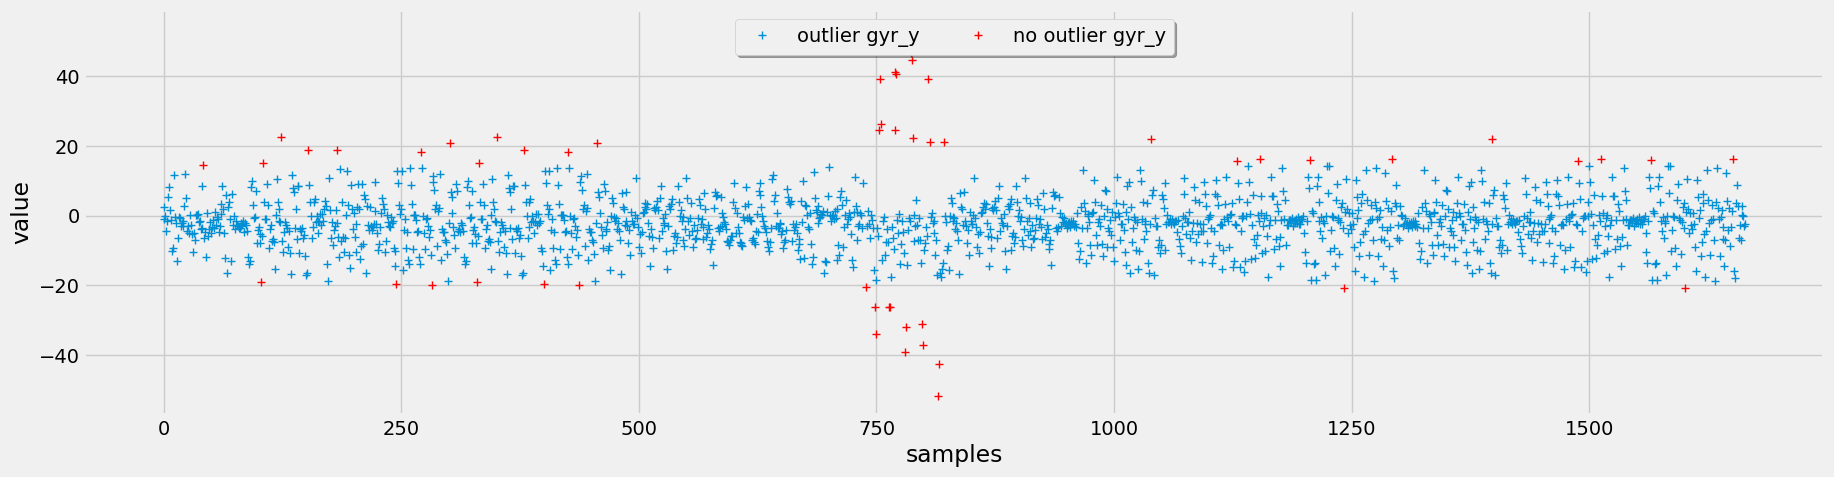

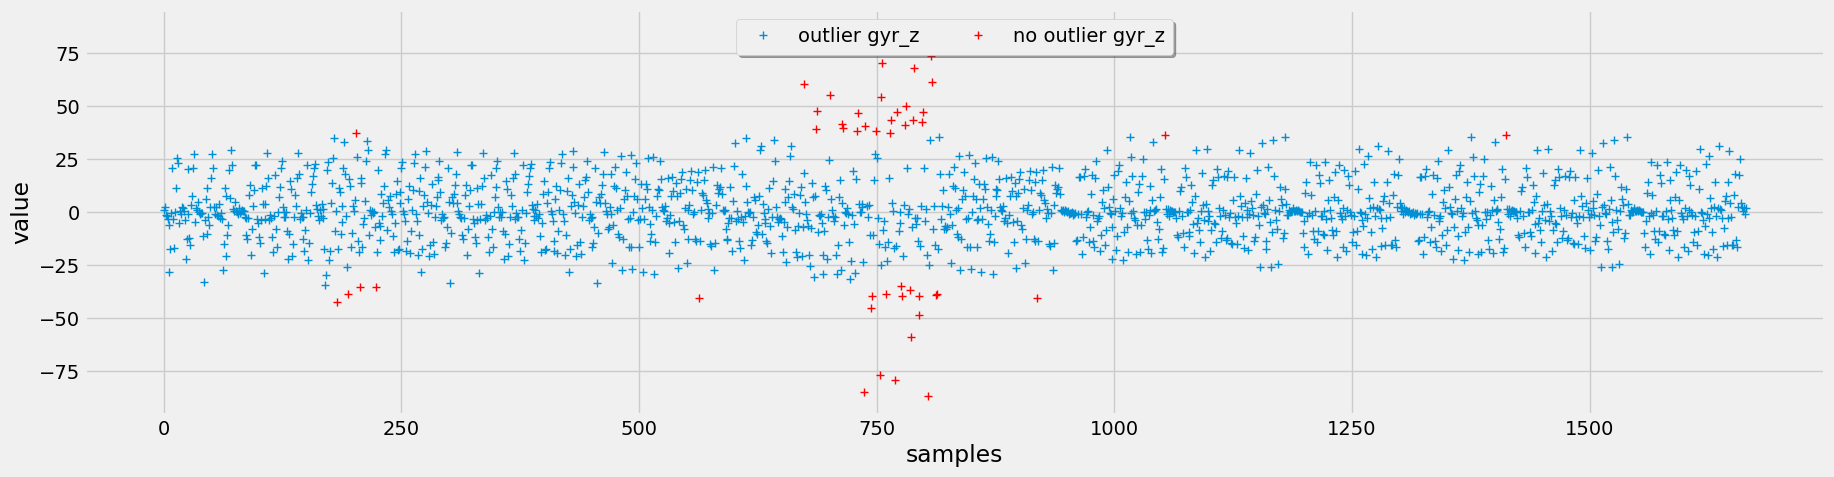

In [2]:
# --------------------------------------------------------------
# Load data
# --------------------------------------------------------------
df = pd.read_pickle("../data/interim/01_data_precessed.pkl")
outlier_columns = df.columns[:6].tolist()

# --------------------------------------------------------------
# Plotting outliers
# --------------------------------------------------------------
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
df[["acc_x", "label"]].boxplot(by="label", figsize=(20, 10))
df[outlier_columns[:3] + ["label"]].boxplot(by="label", figsize=(20, 10), layout=(1, 3))
df[outlier_columns[3:] + ["label"]].boxplot(by="label", figsize=(20, 10), layout=(1, 3))

# --------------------------------------------------------------
# Interquartile range (IQR) (distribution based)
# --------------------------------------------------------------

# Plot a single column
col = "acc_x"
dataset = mark_outliers_IQR(df, col)
plot_binary_outliers(
    dataset=dataset, col=col, outlier_col=col + "_outlier", reset_index=True
)

# Loop over all columns
for col in outlier_columns:
    dataset = mark_outliers_IQR(df, col)
    plot_binary_outliers(
        dataset=dataset, col=col, outlier_col=col + "_outlier", reset_index=True
    )

# --------------------------------------------------------------
# Local outlier factor (LOF)(distance based)
# --------------------------------------------------------------
for col in outlier_columns:
    dataset, outliers, X_scores = mark_outliers_LOF(df, col)
    plot_binary_outliers(
        dataset=dataset, col=col, outlier_col="outlier_lof", reset_index=True
    )
    
# --------------------------------------------------------------
# Check outliers grouped by label
# --------------------------------------------------------------
label = "bench"
for col in outlier_columns:
    dataset = mark_outliers_IQR(df[df["label"] == label], col)
    plot_binary_outliers(
        dataset=dataset, col=col, outlier_col=col + "_outlier", reset_index=True
    )